# Recovering Gardner restacking with purely diffusive operations

[PHYSICAL REVIEW E 102, 063209 (2020)](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.102.063209)

Authors of paper: E. J. Kolmes and N. J. Fisch

Notebook by: Óscar Amaro

### Figure 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [2]:
df_initial = np.array( pd.read_csv('initial.csv',header=None) )
#df_initial.head()

df_plateau = np.array( pd.read_csv('plateau.csv',header=None) )
#df_plateau.head()

df_restacked = np.array( pd.read_csv('restacked.csv',header=None) )
#df_restacked.head()

f_initial = interpolate.interp1d(df_initial[:,0], df_initial[:,1])

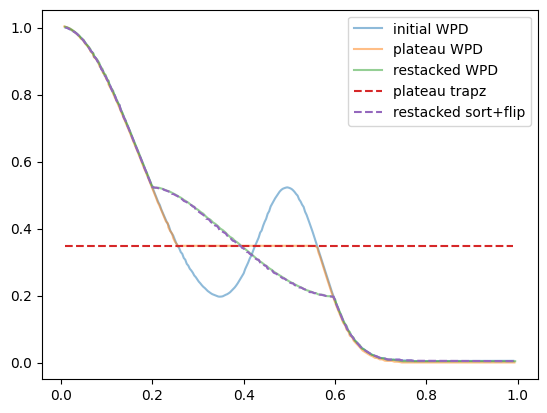

In [3]:
indxs = np.arange(65,170,1)
xlst = np.linspace(0.01, 1-0.01, 300)
ylst = f_initial(xlst)

plt.plot(xlst, ylst, label=r'initial WPD', alpha=0.5)
#plt.plot(xlst[indxs], ylst[indxs])

plt.plot(df_plateau[:,0], df_plateau[:, 1], label=r'plateau WPD', alpha=0.5)
plt.plot(df_restacked[:,0], df_restacked[:, 1], label=r'restacked WPD', alpha=0.5)

ylst2 = np.sort(ylst)
plt.plot(xlst, xlst*0 + np.trapz(ylst[indxs], xlst[indxs])/(np.max(xlst[indxs])-np.min(xlst[indxs])), '--', label=r'plateau trapz')
plt.plot(np.flip(xlst), ylst2, '--', label=r'restacked sort+flip')

plt.legend()
plt.show()